## Importing all the required libraries..

In [42]:
# importing pandas and golb packages...
import pandas as pd
import numpy as np
import glob,os
import glob,os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the required file from the path for Part 1A analysis...

In [43]:
# path where all files are stored...
path=r'C:\Users\susha\Downloads\Neelima\DataScience\GDPAssignment\Data1\Data1A'

# Reading all the paths...
all_files=glob.glob(path+'/*.csv')

# Empty list to add all the dataframes...
all_dfs=[]

# Loop to read each file with the given path...
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='cp1252')

## Transposing and indexing and Data Cleaning the file...Dropping Union Territories...

In [44]:
# Transposing the file
df_part1A=df.T

#Creating the column header
a=df_part1A.iloc[0,:]
b=df_part1A.iloc[1,:]
df_part1A.columns=a+b

#Dropping unnecessary rows and columns..
df_part1A=df_part1A.drop('Duration',axis=0)
df_part1A=df_part1A.drop('Items  Description',axis=0)
df_part1A = df_part1A.astype(float) # Converting dataframe to type float

#Indexing the file..
df_part1A.index.name = 'State'
df_part1A.reset_index(inplace=True)

#Dropping Union Territories..
df_part1A.drop(df_part1A[df_part1A['State'].isin(['West Bengal1','Chandigarh','Andaman & Nicobar Islands','Puducherry','Delhi'])].index, inplace = True)
df_part1A=df_part1A.drop(['GSDP - CURRENT PRICES (` in Crore)2016-17','(% Growth over previous year)2016-17'],axis=1)
df_part1A.reset_index(drop=True,inplace=True)
df_part1A

,State,GSDP - CURRENT PRICES (` in Crore)2011-12,GSDP - CURRENT PRICES (` in Crore)2012-13,GSDP - CURRENT PRICES (` in Crore)2013-14,GSDP - CURRENT PRICES (` in Crore)2014-15,GSDP - CURRENT PRICES (` in Crore)2015-16,(% Growth over previous year)2012-13,(% Growth over previous year)2013-14,(% Growth over previous year)2014-15,(% Growth over previous year)2015-16
0,Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.43,12.85,13.40,15.85
1,Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.41,16.38,14.79,12.07
2,Assam,143175.0,156864.0,177745.0,198098.0,224234.0,9.56,13.31,11.45,13.19
3,Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.25,12.30,17.92,10.59
4,Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.30,16.44,13.69,10.98
5,Goa,42367.0,38120.0,35921.0,40633.0,45002.0,-10.02,-5.77,13.12,10.75
6,Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,17.69,11.47,10.82,11.09
7,Haryana,297539.0,347032.0,400662.0,437462.0,485184.0,16.63,15.45,9.18,10.91
8,Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,NaN,13.89,14.42,10.14,NaN
9,Jammu & Kashmir,78254.0,87105.0,95893.0,100404.0,118387.0,11.31,10.09,4.70,17.91


## Calculating average growth rate for the years 2012-2013,2013-2014,2014-2015,2015-2016

In [45]:
# Averaage growth rates for year 2012 to 2016
cols=['(% Growth over previous year)2012-13','(% Growth over previous year)2013-14','(% Growth over previous year)2014-15','(% Growth over previous year)2015-16']
df_part1A["AvgGR12to16"]=round(df_part1A[cols].mean(axis=1),2)


## Plotting  ' Best Fit Line ' for % Growth over previous year for all the states...
### Calculating the slope for all states to find the best performing state..

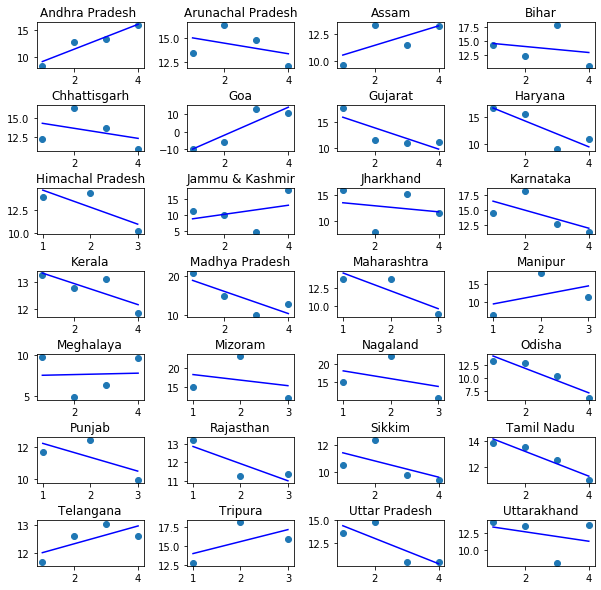

In [46]:
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
slope={}
for i in range(df_part1A.shape[0]-1):
    b=list(df_part1A.loc[i, ['(% Growth over previous year)2012-13','(% Growth over previous year)2013-14','(% Growth over previous year)2014-15','(% Growth over previous year)2015-16']].dropna())
    a=np.linspace(1,len(b),num=len(b),dtype='int64')
    data={'x':a,'y':b}
    s=df_part1A.loc[i, ['State']]
    df2=pd.DataFrame(data)
    m,c=np.polyfit(df2['x'], df2['y'],1)
    slope.update({s[0]:round(m,2)})
    ax=plt.subplot(7,4,i+1)
    ax.title.set_text(s[0])
    plt.scatter(x = 'x', y = 'y', data = df2)
    plt.plot(df2['x'], m*df2['x']+c , 'b')  

### Plotting graph for Nation...

The growth rate of All_India GDP is -1.393


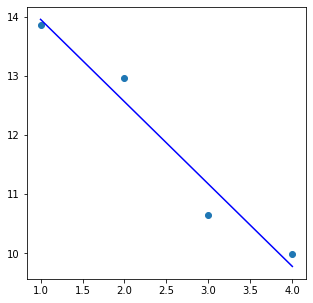

In [47]:
fig=plt.figure(figsize=(5,5))
b=list(df_part1A.loc[28, ['(% Growth over previous year)2012-13','(% Growth over previous year)2013-14','(% Growth over previous year)2014-15','(% Growth over previous year)2015-16']].dropna())
a=np.linspace(1,len(b),num=len(b),dtype='int64')
data={'x':a,'y':b}
s=df_part1A.loc[28, ['State']]
df2=pd.DataFrame(data)
m,c=np.polyfit(df2['x'], df2['y'],1)
slope.update({s[0]:round(m,2)})
plt.scatter(x = 'x', y = 'y', data = df2)
plt.plot(df2['x'], m*df2['x']+c, 'b') 
ax.set_title(s[0])
print("The growth rate of {} is {}".format(s[0],m))

### Comparing the growth rates of the states by finding out the slope for each state and also by visualising the graphs
1. If we want to compare 2 states growth rate we should plot the % Growth rate of all individual states. Then to compare the growth between 2 states we just need to look at the base point which gives us the minimum GDP and then the slope of the line which gives us the growth rate of that state. 
2. If we look at the growth rates of different states we can find that Goa,Manipur and Andhra Pradesh are the fastest growing states and Madhya Pradesh,Maharashtra and Odisha are the slowest growing states
3. The Nations growth has been decelerating by 1.393%
4. The homestate Karnataka has been decelerating at the rate of -1.5%.Thus when compared to the nations growth rate Karnataka is little slower by 0.107%

In [48]:
#Printing slopes for all the states...
print(sorted(slope.items(), key =lambda kv:(kv[1], kv[0]))) 

[('Madhya Pradesh', -2.84), ('Maharashtra', -2.51), ('Odisha', -2.4), ('Haryana', -2.34), ('Nagaland', -2.09), ('Gujarat', -2.05), ('Himachal Pradesh', -1.88), ('Karnataka', -1.5), ('Mizoram', -1.45), ('All_India GDP', -1.39), ('Uttar Pradesh', -1.34), ('Tamil Nadu', -0.96), ('Rajasthan', -0.91), ('Punjab', -0.86), ('Uttarakhand', -0.69), ('Chhattisgarh', -0.67), ('Sikkim', -0.6), ('Jharkhand', -0.58), ('Arunachal Pradesh', -0.56), ('Bihar', -0.54), ('Kerala', -0.39), ('Meghalaya', 0.08), ('Telangana', 0.31), ('Assam', 0.9), ('Jammu & Kashmir', 1.44), ('Tripura', 1.57), ('Andhra Pradesh ', 2.28), ('Manipur', 2.47), ('Goa', 8.12)]


## Plotting graph for the average value AvgGR12to16 for all the states...

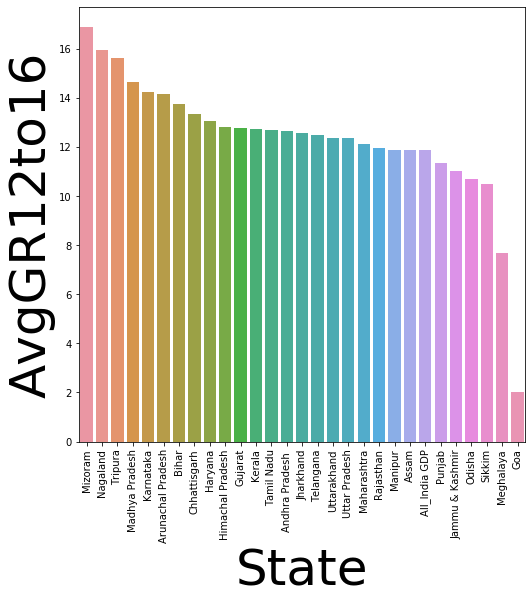

In [49]:
fig=plt.figure(figsize=(8,8))
df_part1A.sort_values(['AvgGR12to16'], axis=0,ascending=False, inplace=True)
sns.barplot(x='State',y='AvgGR12to16',data=df_part1A)
plt.xticks(rotation=90)
plt.rcParams["axes.labelsize"] = 15

## Plotting GSDp for year 2015-2016

In [50]:
# sorting dataframe for GSDP year 2014-2015
df_part1A.sort_values(['GSDP - CURRENT PRICES (` in Crore)2014-15'], axis=0,ascending=False, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

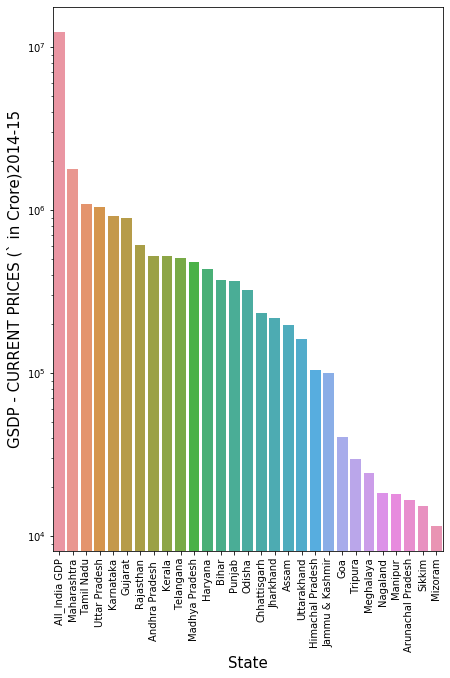

In [51]:
fig=plt.figure(figsize=(7,10))
g=sns.barplot(x='State',y='GSDP - CURRENT PRICES (` in Crore)2014-15',data=df_part1A)
g.set_yscale("log")
plt.xticks(rotation=90)

1. Bar Graph is the best plot to compare GDP'S of different states for a single year like 2015-2016
2. Top 5 states which has highest GDP :
    1. Maharashtra
    2. TamilNadu.
    3. Uttar Pradesh
    4. Karnataka
    5. Gujarath
3. Bottom 5 states which has lowest GDP :
    1. Mizoram
    2. Sikkim
    3. Arunachal Pradesh
    4. Manipur
    5. Nagaland
4. To find out which states are performing poorly we would need 2 data points
    1. Average GDP of individual states.
    2. Growth rates of the individual states.
    So lets list down the states in the order of ascending average GDP and then lets find out among them whose growth rates are growing and whose growth rates are decelarting. The decelarting states with lowest GDPs are the ones which are doing very poorly. 

## Reading the required files from the path for Part 1B analysis...
### All states and union territories files to be stored in a seperate folder..

In [52]:
# path where all files are stored...
path=r'C:\Users\susha\Downloads\Neelima\DataScience\GDPAssignment\Data1\Data1B'

# Reading all the paths...
all_files=glob.glob(path+'\\*.csv')

# Empty list to add all the dataframes...
all_dfs=[]
col=[]

# Loop to read each file with the given path...
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='cp1252')
    df=df[['S.No.','Item','2014-15']] #Fetching the required columns from the files 2014-2015
    df=df.T                           #Transposing the file..
    a=df.iloc[0,:]                    #creating a column header
    b=df.iloc[1,:]
    df.columns=a+b
    df=df.drop('S.No.',axis=0).rename_axis('Sl.No', axis=0) #Labelling the file
    df.index=[0,1]
    val=pd.DataFrame( ['Item',filename.split('//')[-1].split("-")[1]]) #Fetching the state name from the filename
    df.insert (0, "State",val )
    df=df.drop([0],axis=0)
    all_dfs.append(df)

In [53]:
# Assigning all column headers of the files to a single name so that they can be merged easily...
col=all_dfs[0].columns
for i in range(len(all_dfs)):
    all_dfs[i].columns=col


### Merging all the downloaded files in to a single dataframe...

In [54]:
df_part1B=pd.concat(all_dfs,axis=0,sort=False,ignore_index=True)
#df_part1B = df_part1B.astype(float) #converting dataframe to type float

df_part1B

,State,"1Agriculture, forestry and fishing",1.1Crops,1.2Livestock,1.3Forestry and logging,1.4Fishing and aquaculture,2Mining and quarrying,TotalPrimary,3Manufacturing,"4Electricity, gas, water supply & other utility services",...,"9Real estate, ownership of dwelling & professional services",10Public administration,11Other services,TotalTertiary,12TOTAL GSVA at basic prices,13Taxes on Products,14Subsidies on products,15Gross State Domestic Product,16Population ('00),17Per Capita GSDP (Rs.)
0,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,...,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
1,Arunachal_Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,...,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
2,Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,...,1412466,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621
3,Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,...,3740641,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954
4,Chandigarh,16233,1659,13992,388,194,179,16412,149631,29741,...,598448,183889,156543,2426008,2755113,52622,23309,2784426,11120,250398
5,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,...,2462166,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860
6,Delhi,250568,64959,183770,861,978,963777,1214345,2749307,971255,...,11733335,2008191,3829385,36039554,43023249,6611719,392546,49242422,179690,274041
7,Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,...,407099,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793
8,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,...,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263
9,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,...,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077


In [55]:
df_part1B.iloc[0,:]

State                                                                    Andhra_Pradesh
1Agriculture, forestry and fishing                                             14819416
1.1Crops                                                                        7893514
1.2Livestock                                                                    4309078
1.3Forestry and logging                                                          346160
1.4Fishing and aquaculture                                                      2270664
2Mining and quarrying                                                           1484300
TotalPrimary                                                                   16303716
3Manufacturing                                                                  4672266
4Electricity, gas, water supply & other utility services                        1151729
5Construction                                                                   4664889
TotalSecondary                  

 ## Removing Union Territories from the dataframe...

In [56]:
UT=['Puducherry','Chandigarh','Delhi']
df_part1B.drop(df_part1B[df_part1B['State'].isin(UT)].index,inplace=True)
df_part1B.reset_index(drop=True, inplace=True)
df_part1B

,State,"1Agriculture, forestry and fishing",1.1Crops,1.2Livestock,1.3Forestry and logging,1.4Fishing and aquaculture,2Mining and quarrying,TotalPrimary,3Manufacturing,"4Electricity, gas, water supply & other utility services",...,"9Real estate, ownership of dwelling & professional services",10Public administration,11Other services,TotalTertiary,12TOTAL GSVA at basic prices,13Taxes on Products,14Subsidies on products,15Gross State Domestic Product,16Population ('00),17Per Capita GSDP (Rs.)
0,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,...,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
1,Arunachal_Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,...,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
2,Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,...,1412466,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621
3,Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,...,3740641,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954
4,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,...,2462166,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860
5,Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,...,407099,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793
6,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,...,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263
7,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,...,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077
8,Himachal_Pradesh,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,...,1125937,553974,923164,4133326,9800853,895317,259291,10436879,70840,147330
9,Jammu_Kashmir,1586705,949424,433133,168093,36055,33621,1620326,893207,597421,...,1340082,1349880,946826,5613282,9509739,764270,233563,10040446,132390,75840


### Plotting GDP per capita for all the states for the year 2014-2015...

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

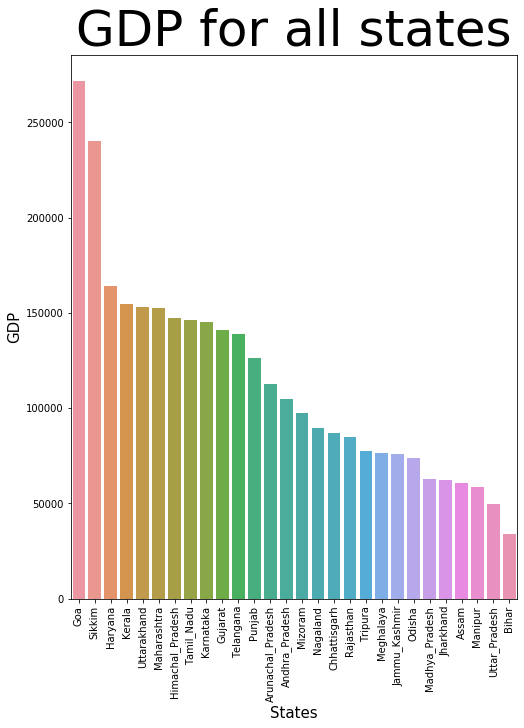

In [57]:
fig=plt.figure(figsize=(8,10))
df_part1B.sort_values(['17Per Capita GSDP (Rs.)'], axis=0,ascending=False, inplace=True)
ax=sns.barplot(x='State',y='17Per Capita GSDP (Rs.)',data=df_part1B)
ax.set(xlabel='States', ylabel='GDP')
plt.rcParams["axes.labelsize"] = 50
ax.axes.set_title("GDP for all states",fontsize=50)
plt.xticks(rotation=90)

### The Top and Bottom 5 states which has highest and lowest GDP...
1. Tho top 5 states being :
    1. Goa
    2. Sikkim
    3. Haryana
    4. Kerala
    5. Uttarakhand
2. The bottom 5 states :
    1. Bihar
    2. Uttar Pradesh
    3. Manipur
    4. Assam
    5. Jharkhand

###                                                             ************************

### The ratio of the highest per capita GDP to the lowest per capita GDP..
1. From the graph above we understood Goa being the state with highest per capita GDP and Bihar being the lowest percapita    GDP the ratio between them is 8:1
2. That means Goa's per capita GDP is 8 times greater than Bihar percapita GDP

In [58]:
### The ratio of the highest per capita GDP to the lowest per capita GDP..
ratio=max(df_part1B['17Per Capita GSDP (Rs.)'])/min(df_part1B['17Per Capita GSDP (Rs.)'])
print("The percapita GDP ratio between Goa and Bihar is {}:1".format(round(ratio)))

The percapita GDP ratio between Goa and Bihar is 8:1


### Percentage contribution of Primary,Secondary and Tertiary sectors..

In [59]:
df_part1B['%Pri_con']=100*(df_part1B['TotalPrimary']/df_part1B['15Gross State Domestic Product'])
df_part1B['%Sec_con']=100*(df_part1B['TotalSecondary']/df_part1B['15Gross State Domestic Product'])
df_part1B['%Ter_con']=100*(df_part1B['TotalTertiary']/df_part1B['15Gross State Domestic Product'])

In [60]:
df_part1B['%Pri_con'] =df_part1B['%Pri_con'].astype(float)
df_part1B['%Sec_con']=df_part1B['%Sec_con'].astype(float)
df_part1B['%Ter_con']=df_part1B['%Ter_con'].astype(float)

### Plotting Stacked bar graphs for primary,secondary and tertiary contributions of the states:
Choosen stacked bar because it is easy to visualise the contribution in a single graph.

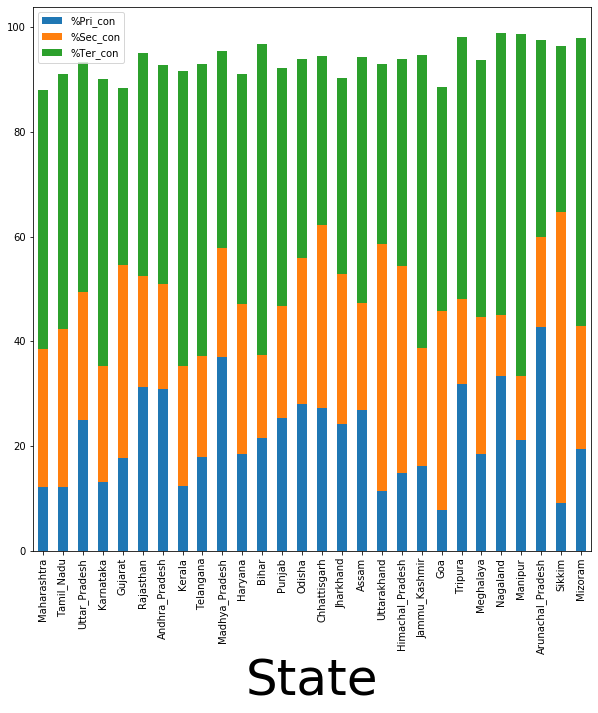

In [61]:
df_part1B.sort_values(['15Gross State Domestic Product'], axis=0,ascending=False, inplace=True)
plt.rcParams["figure.figsize"] = [10,10]
ax=df_part1B[['State','%Pri_con','%Sec_con','%Ter_con' ]].plot(kind='bar',x='State',stacked=True)


### (Primary + Secondary + Tertiary) not equal to total GDP because there are taxes applicable on GSVA and again government provides subsidary.
So for total GSVA we have to add the taxes and then subtract the subsidary given by government which is equal to GSDP

### Correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

In [62]:
df_part1B['GSDP_rank'] = df_part1B['15Gross State Domestic Product'].rank()
# df_part1B['Correlation']=df_part1B['GSDP_rank'].corr(df_part1B['%Pri_con'])
corr=df_part1B.corr()
corr


,%Pri_con,%Sec_con,%Ter_con,GSDP_rank
%Pri_con,1.000000,-0.588646,-0.147342,-0.123974
%Sec_con,-0.588646,1.000000,-0.676509,-0.066902
%Ter_con,-0.147342,-0.676509,1.000000,-0.026863
GSDP_rank,-0.123974,-0.066902,-0.026863,1.000000


### Categorising the states into four groups based on the GDP per capita ..

In [63]:
x=list(df_part1B['17Per Capita GSDP (Rs.)'].quantile([0.2,0.5,.85,1]))
x

[67385.0, 101332.0, 153064.85, 271793.0]

In [64]:
df_part1B=df_part1B.sort_index()
df_part1B

,State,"1Agriculture, forestry and fishing",1.1Crops,1.2Livestock,1.3Forestry and logging,1.4Fishing and aquaculture,2Mining and quarrying,TotalPrimary,3Manufacturing,"4Electricity, gas, water supply & other utility services",...,12TOTAL GSVA at basic prices,13Taxes on Products,14Subsidies on products,15Gross State Domestic Product,16Population ('00),17Per Capita GSDP (Rs.),%Pri_con,%Sec_con,%Ter_con,GSDP_rank
0,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,...,48825542,5512100,1690800,52646842,501510,104977,30.968080,19.923102,41.850453,22.0
1,Arunachal_Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,...,1636292,70099,30272,1676119,14870,112718,42.774946,17.152064,37.696846,3.0
2,Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,...,18666897,1725309,582406,19809800,326780,60621,26.889201,20.359070,46.982347,12.0
3,Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,...,36184863,3213546,2006421,37391988,1101240,33954,21.448437,16.005825,59.317437,17.0
4,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,...,22228481,2601791,1332092,23498180,270530,86860,27.239629,35.061805,32.295173,14.0
5,Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,...,3597882,527279,61854,4063307,14950,271793,7.681649,38.085628,42.778382,8.0
6,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,...,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,17.750506,36.896684,33.764756,24.0
7,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,...,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,18.379705,28.714286,43.950252,18.0
8,Himachal_Pradesh,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,...,9800853,895317,259291,10436879,70840,147330,14.835527,39.467373,39.603084,10.0
9,Jammu_Kashmir,1586705,949424,433133,168093,36055,33621,1620326,893207,597421,...,9509739,764270,233563,10040446,132390,75840,16.137988,22.669630,55.906700,9.0


## Categorising States based on the GSDP percentile into four categories such as C1,C2,C3,C4

In [65]:
#Creating empty column category
df_part1B['Category']=""
#Tagging states..
for i in range(len(df_part1B)):
    if (((df_part1B.loc[i,['17Per Capita GSDP (Rs.)']])<=x[3] )& ((df_part1B.loc[i,['17Per Capita GSDP (Rs.)']])>x[2])).all():
        df_part1B.loc[i,['Category']]='C1'
    elif (((df_part1B.loc[i,['17Per Capita GSDP (Rs.)']])<=x[2] )&((df_part1B.loc[i,['17Per Capita GSDP (Rs.)']])>x[1])).all():
        df_part1B.loc[i,['Category']]='C2'
    elif (((df_part1B.loc[i,['17Per Capita GSDP (Rs.)']])<=x[1] )&((df_part1B.loc[i,['17Per Capita GSDP (Rs.)']])>x[0])).all():
        df_part1B.loc[i,['Category']]='C3'
    else:    
        df_part1B.loc[i,['Category']]='C4'

In [66]:
df_part1B['11Other services']


0         4215389
1          218728
2         1795658
3         4587589
4         1112232
5          180431
6     3.12341e+06
7     2.00158e+06
8          923164
9          946826
10        1375410
11        5308174
12        5728645
13        2747805
14       10806363
15         317930
16         214211
17         186222
18         259186
19        2340603
20        3303041
21        4164287
22         149265
23        7430115
24        4158229
25         323287
26         982430
27        5034623
Name: 11Other services, dtype: object

#### Finding the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of category 1 ie C1.

In [67]:
# Calculating total subsectors contribution for  category C1
SubSector1_C1=0
SubSector2_C1=0
SubSector3_C1=0
SubSector4_C1=0
SubSector5_C1=0
SubSector6_C1=0
SubSector7_C1=0
SubSector8_C1=0
SubSector9_C1=0
SubSector10_C1=0
SubSector11_C1=0
TotGSDP_C1=0
for i in range(len(df_part1B)):
    if (df_part1B.loc[i,['Category']]=='C1').all():
        SubSector1_C1=SubSector1_C1+df_part1B.loc[i,['1Agriculture, forestry and fishing']]
        SubSector2_C1=SubSector2_C1+df_part1B.loc[i,['2Mining and quarrying']]
        SubSector3_C1=SubSector3_C1+df_part1B.loc[i,['3Manufacturing']]
        SubSector4_C1=SubSector4_C1+df_part1B.loc[i,['4Electricity, gas, water supply & other utility services']]
        SubSector5_C1=SubSector5_C1+df_part1B.loc[i,['5Construction']]                                            
        SubSector6_C1=SubSector6_C1+df_part1B.loc[i,['6Trade, repair, hotels and restaurants']]                                             
        SubSector7_C1=SubSector7_C1+df_part1B.loc[i,['7Transport, storage, communication & services related to broadcasting']]
        SubSector8_C1=SubSector8_C1+df_part1B.loc[i,['8Financial services']]
        SubSector9_C1=SubSector9_C1+df_part1B.loc[i,['9Real estate, ownership of dwelling & professional services']]
        SubSector2_C1=SubSector10_C1+df_part1B.loc[i,['10Public administration']]                                            
        SubSector2_C1=SubSector11_C1+df_part1B.loc[i,['11Other services']]    
        TotGSDP_C1=TotGSDP_C1+df_part1B.loc[i,['15Gross State Domestic Product']]
PerSubSector1_C1=(SubSector1_C1[0]/TotGSDP_C1[0])*100
PerSubSector2_C1=(SubSector2_C1[0]/TotGSDP_C1[0])*100
PerSubSector3_C1=(SubSector3_C1[0]/TotGSDP_C1[0])*100
PerSubSector4_C1=(SubSector4_C1[0]/TotGSDP_C1[0])*100
PerSubSector5_C1=(SubSector5_C1[0]/TotGSDP_C1[0])*100
PerSubSector6_C1=(SubSector6_C1[0]/TotGSDP_C1[0])*100
PerSubSector7_C1=(SubSector7_C1[0]/TotGSDP_C1[0])*100
PerSubSector8_C1=(SubSector8_C1[0]/TotGSDP_C1[0])*100
PerSubSector9_C1=(SubSector9_C1[0]/TotGSDP_C1[0])*100
PerSubSector10_C1=(SubSector10_C1/TotGSDP_C1[0])*100
PerSubSector11_C1=(SubSector11_C1/TotGSDP_C1[0])*100

print('PerSubSector1_C1 : {}\n PerSubSector2_C1 : {}\n PerSubSector3_C1 : {}\n PerSubSector4_C1 : {}\n PerSubSector5_C1 : {}\n PerSubSector6_C1 : {}\n PerSubSector7_C1 : {}\n PerSubSector8_C1 : {}\n PerSubSector9_C1 : {}\n PerSubSector10_C1 : {}\n PerSubSector11_C1 :{}'.format(PerSubSector1_C1, PerSubSector2_C1, PerSubSector3_C1,PerSubSector4_C1, PerSubSector5_C1, PerSubSector6_C1, PerSubSector7_C1, PerSubSector8_C1, PerSubSector9_C1, PerSubSector10_C1, PerSubSector11_C1))


PerSubSector1_C1 : 13.53876195527802
 PerSubSector2_C1 : 0.8316571602115062
 PerSubSector3_C1 : 16.61320317348108
 PerSubSector4_C1 : 2.0611989891813884
 PerSubSector5_C1 : 10.672368355713829
 PerSubSector6_C1 : 13.32292456109457
 PerSubSector7_C1 : 6.675108778772287
 PerSubSector8_C1 : 3.658298524414022
 PerSubSector9_C1 : 13.18179688772309
 PerSubSector10_C1 : 0.0
 PerSubSector11_C1 :0.0


### Plotting bargraph..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 360x360 with 0 Axes>

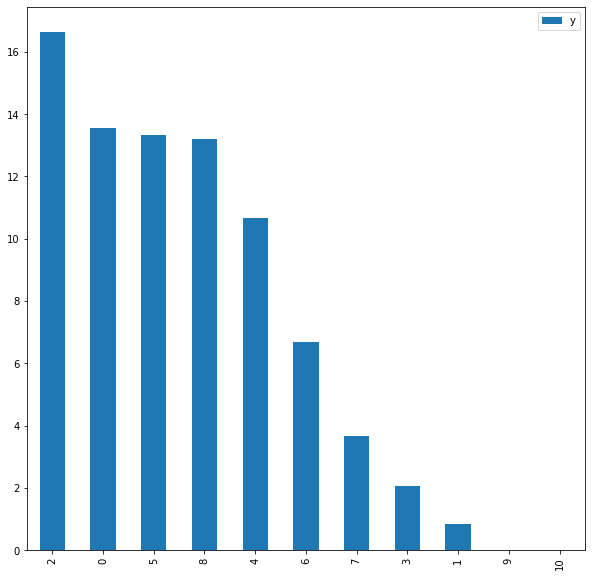

In [68]:
c1=['Agriculture,forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services']
c2=[PerSubSector1_C1,PerSubSector2_C1,PerSubSector3_C1,PerSubSector4_C1,PerSubSector5_C1,PerSubSector6_C1 ,PerSubSector7_C1,PerSubSector8_C1,PerSubSector9_C1, PerSubSector10_C1,PerSubSector11_C1]
data={'x':c1,'y':c2}
df3=pd.DataFrame(data)
df3['y'].astype(float)
fig=plt.figure(figsize=(5,5))
df3.sort_values(['y'], axis=0,ascending=False, inplace=True)
ax=df3[['x','y' ]].plot(kind='bar')
plt.xticks(rotation=90)

### The top sub sectors that contribute to the approximately 80% for C1 Category are as follows:
1. Manufacturing
2. Agriculture, forestry and fishing
3. Trade, repair, hotels and restaurants
4. Real estate, ownership of dwelling & professional services
5. Construction
6. Transport, storage, communication & services related to broadcasting
7. Financial services
8. Electricity, gas, water supply & other utility services

#### Finding the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of category 2 ie C2

In [69]:
# Calculating total subsectors contribution for  category C2
SubSector1_C2=0
SubSector2_C2=0
SubSector3_C2=0
SubSector4_C2=0
SubSector5_C2=0
SubSector6_C2=0
SubSector7_C2=0
SubSector8_C2=0
SubSector9_C2=0
SubSector10_C2=0
SubSector11_C2=0
TotGSDP_C2=0
for i in range(len(df_part1B)):
    if (df_part1B.loc[i,['Category']]=='C2').all():
        SubSector1_C2=SubSector1_C2+df_part1B.loc[i,['1Agriculture, forestry and fishing']]
        SubSector2_C2=SubSector2_C2+df_part1B.loc[i,['2Mining and quarrying']]
        SubSector3_C2=SubSector3_C2+df_part1B.loc[i,['3Manufacturing']]
        SubSector4_C2=SubSector4_C2+df_part1B.loc[i,['4Electricity, gas, water supply & other utility services']]
        SubSector5_C2=SubSector5_C2+df_part1B.loc[i,['5Construction']]                                            
        SubSector6_C2=SubSector6_C2+df_part1B.loc[i,['6Trade, repair, hotels and restaurants']]                                             
        SubSector7_C2=SubSector7_C2+df_part1B.loc[i,['7Transport, storage, communication & services related to broadcasting']]
        SubSector8_C2=SubSector8_C2+df_part1B.loc[i,['8Financial services']]
        SubSector9_C2=SubSector9_C2+df_part1B.loc[i,['9Real estate, ownership of dwelling & professional services']]
        SubSector2_C2=SubSector10_C2+df_part1B.loc[i,['10Public administration']]                                            
        SubSector2_C2=SubSector11_C2+df_part1B.loc[i,['11Other services']] 
        TotGSDP_C2=TotGSDP_C2+df_part1B.loc[i,['15Gross State Domestic Product']]
PerSubSector1_C2=(SubSector1_C2[0]/TotGSDP_C2[0])*100
PerSubSector2_C2=(SubSector2_C2[0]/TotGSDP_C2[0])*100
PerSubSector3_C2=(SubSector3_C2[0]/TotGSDP_C2[0])*100
PerSubSector4_C2=(SubSector4_C2[0]/TotGSDP_C2[0])*100
PerSubSector5_C2=(SubSector5_C2[0]/TotGSDP_C2[0])*100
PerSubSector6_C2=(SubSector6_C2[0]/TotGSDP_C2[0])*100
PerSubSector7_C2=(SubSector7_C2[0]/TotGSDP_C2[0])*100
PerSubSector8_C2=(SubSector8_C2[0]/TotGSDP_C2[0])*100
PerSubSector9_C2=(SubSector9_C2[0]/TotGSDP_C2[0])*100
PerSubSector10_C2=(SubSector10_C2/TotGSDP_C2[0])*100
PerSubSector11_C2=(SubSector11_C2/TotGSDP_C2[0])*100

print('PerSubSector1_C2 : {}\n PerSubSector2_C2 : {}\n PerSubSector3_C2 : {}\n PerSubSector4_C2 : {}\n PerSubSector5_C2 : {}\n PerSubSector6_C2 : {}\n PerSubSector7_C2 : {}\n PerSubSector8_C2 : {}\n PerSubSector9_C2 : {}\n PerSubSector10_C2 : {}\n PerSubSector11_C2 :{}'.format(PerSubSector1_C2, PerSubSector2_C2, PerSubSector3_C2,PerSubSector4_C2, PerSubSector5_C2, PerSubSector6_C2, PerSubSector7_C2, PerSubSector8_C2, PerSubSector9_C2, PerSubSector10_C2, PerSubSector11_C2))



PerSubSector1_C2 : 14.197644676863952
 PerSubSector2_C2 : 0.6676359914108977
 PerSubSector3_C2 : 17.34064803509838
 PerSubSector4_C2 : 2.3347070362108275
 PerSubSector5_C2 : 7.0606433856663635
 PerSubSector6_C2 : 10.232211416889198
 PerSubSector7_C2 : 6.062677435908086
 PerSubSector8_C2 : 6.07108680987141
 PerSubSector9_C2 : 15.364664154520865
 PerSubSector10_C2 : 0.0
 PerSubSector11_C2 :0.0


### Plotting bargraph..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 360x360 with 0 Axes>

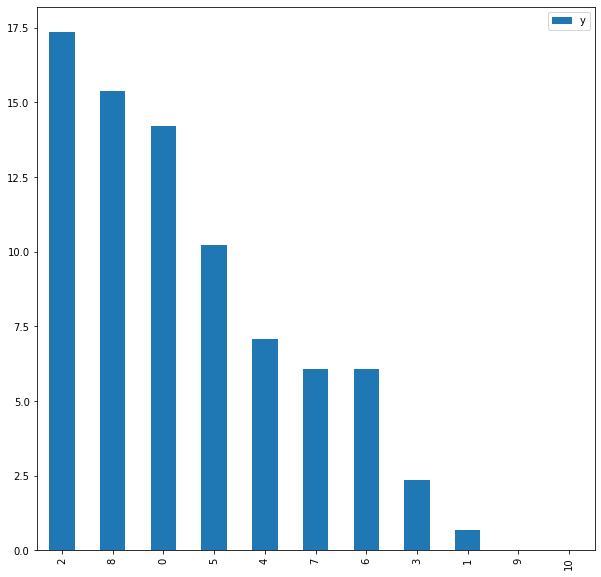

In [70]:
c1=['Agriculture,forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services']
c2=[PerSubSector1_C2,PerSubSector2_C2,PerSubSector3_C2,PerSubSector4_C2,PerSubSector5_C2,PerSubSector6_C2 ,PerSubSector7_C2,PerSubSector8_C2,PerSubSector9_C2, PerSubSector10_C2,PerSubSector11_C2]
data={'x':c1,'y':c2}
df3=pd.DataFrame(data)
df3['y'].astype(float)
fig=plt.figure(figsize=(5,5))
df3.sort_values(['y'], axis=0,ascending=False, inplace=True)
ax=df3[['x','y' ]].plot(kind='bar')
plt.xticks(rotation=90)


### The top sub sectors that contribute to approximately 80% for C2 Category in that order are as follows:
1. Manufacturing
2. Real estate, ownership of dwelling & professional services
3. Agriculture, forestry and fishing
4. Trade, repair, hotels and restaurants
5. Construction
6. Financial services
7. Transport, storage, communication & services related to broadcasting
8. Electricity, gas, water supply & other utility services
9. Mining and quarrying
 

#### Finding the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of category 3 ie C3

In [71]:
# Calculating total subsectors contribution for  category C3
SubSector1_C3=0
SubSector2_C3=0
SubSector3_C3=0
SubSector4_C3=0
SubSector5_C3=0
SubSector6_C3=0
SubSector7_C3=0
SubSector8_C3=0
SubSector9_C3=0
SubSector10_C3=0
SubSector11_C3=0
TotGSDP_C3=0
for i in range(len(df_part1B)):
    if (df_part1B.loc[i,['Category']]=='C3').all():
        SubSector1_C3=SubSector1_C3+df_part1B.loc[i,['1Agriculture, forestry and fishing']]
        SubSector2_C3=SubSector2_C3+df_part1B.loc[i,['2Mining and quarrying']]
        SubSector3_C3=SubSector3_C3+df_part1B.loc[i,['3Manufacturing']]
        SubSector4_C3=SubSector4_C3+df_part1B.loc[i,['4Electricity, gas, water supply & other utility services']]
        SubSector5_C3=SubSector5_C3+df_part1B.loc[i,['5Construction']]                                            
        SubSector6_C3=SubSector6_C3+df_part1B.loc[i,['6Trade, repair, hotels and restaurants']]                                             
        SubSector7_C3=SubSector7_C3+df_part1B.loc[i,['7Transport, storage, communication & services related to broadcasting']]
        SubSector8_C3=SubSector8_C3+df_part1B.loc[i,['8Financial services']]
        SubSector9_C3=SubSector9_C3+df_part1B.loc[i,['9Real estate, ownership of dwelling & professional services']]
        SubSector2_C3=SubSector10_C3+df_part1B.loc[i,['10Public administration']]                                            
        SubSector2_C3=SubSector11_C3+df_part1B.loc[i,['11Other services']]  
        TotGSDP_C3=TotGSDP_C3+df_part1B.loc[i,['15Gross State Domestic Product']]
PerSubSector1_C3=(SubSector1_C3[0]/TotGSDP_C3[0])*100
PerSubSector2_C3=(SubSector2_C3[0]/TotGSDP_C3[0])*100
PerSubSector3_C3=(SubSector3_C3[0]/TotGSDP_C3[0])*100
PerSubSector4_C3=(SubSector4_C3[0]/TotGSDP_C3[0])*100
PerSubSector5_C3=(SubSector5_C3[0]/TotGSDP_C3[0])*100
PerSubSector6_C3=(SubSector6_C3[0]/TotGSDP_C3[0])*100
PerSubSector7_C3=(SubSector7_C3[0]/TotGSDP_C3[0])*100
PerSubSector8_C3=(SubSector8_C3[0]/TotGSDP_C3[0])*100
PerSubSector9_C3=(SubSector9_C3[0]/TotGSDP_C3[0])*100
PerSubSector10_C3=(SubSector10_C3/TotGSDP_C3[0])*100
PerSubSector11_C3=(SubSector11_C3/TotGSDP_C3[0])*100

print('PerSubSector1_C3 : {}\n PerSubSector2_C3 : {}\n PerSubSector3_C3 : {}\n PerSubSector4_C3 : {}\n PerSubSector5_C3 : {}\n PerSubSector6_C3 : {}\n PerSubSector7_C3 : {}\n PerSubSector8_C3 : {}\n PerSubSector9_C3 : {}\n PerSubSector10_C3 : {}\n PerSubSector11_C3 :{}'.format(PerSubSector1_C3, PerSubSector2_C3, PerSubSector3_C3,PerSubSector4_C3, PerSubSector5_C3, PerSubSector6_C3, PerSubSector7_C3, PerSubSector8_C3, PerSubSector9_C3, PerSubSector10_C3, PerSubSector11_C3))


PerSubSector1_C3 : 21.420049444299977
 PerSubSector2_C3 : 0.2388349745088266
 PerSubSector3_C3 : 13.489415790519669
 PerSubSector4_C3 : 2.992365742695713
 PerSubSector5_C3 : 8.738575492369824
 PerSubSector6_C3 : 10.270272550476161
 PerSubSector7_C3 : 5.811947785959886
 PerSubSector8_C3 : 3.131925444646343
 PerSubSector9_C3 : 9.721329694828365
 PerSubSector10_C3 : 0.0
 PerSubSector11_C3 :0.0


### Plotting bargraph..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 360x360 with 0 Axes>

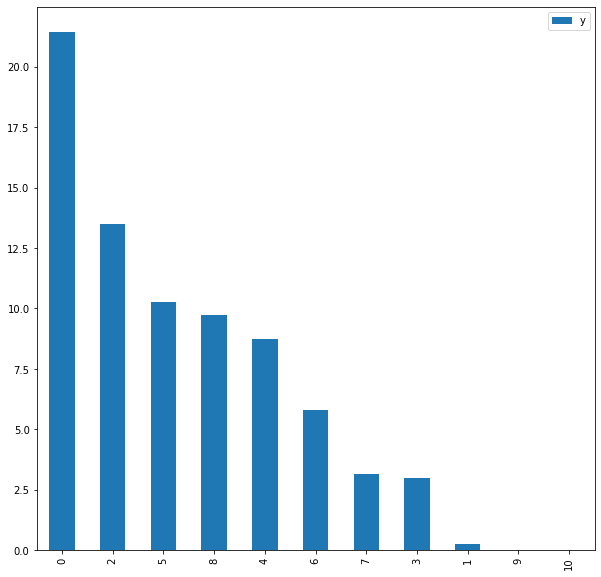

In [72]:
c1=['Agriculture,forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services']
c2=[PerSubSector1_C3,PerSubSector2_C3,PerSubSector3_C3,PerSubSector4_C3,PerSubSector5_C3,PerSubSector6_C3 ,PerSubSector7_C3,PerSubSector8_C3,PerSubSector9_C3, PerSubSector10_C3,PerSubSector11_C3]
data={'x':c1,'y':c2}
df3=pd.DataFrame(data)
df3['y'].astype(float)
fig=plt.figure(figsize=(5,5))
df3.sort_values(['y'], axis=0,ascending=False, inplace=True)
ax=df3[['x','y' ]].plot(kind='bar')
plt.xticks(rotation=90)


### The top sub sectors that contribute to approximately 80% for C3 Category in that order are as follows:
1. Agriculture, forestry and fishing
2. Manufacturing
3. Trade, repair, hotels and restaurants
4. Real estate, ownership of dwelling & professional services
5. Construction
6. Transport, storage, communication & services related to broadcasting
7. Financial services 
8. Electricity, gas, water supply & other utility services
9. Mining and quarrying

#### Finding the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of category 4 ie C4.

In [73]:
# Calculating total subsectors contribution for  category C4
SubSector1_C4=0
SubSector2_C4=0
SubSector3_C4=0
SubSector4_C4=0
SubSector5_C4=0
SubSector6_C4=0
SubSector7_C4=0
SubSector8_C4=0
SubSector9_C4=0
SubSector10_C4=0
SubSector11_C4=0
TotGSDP_C4=0
for i in range(len(df_part1B)):
    if (df_part1B.loc[i,['Category']]=='C4').all():
        SubSector1_C4=SubSector1_C4+df_part1B.loc[i,['1Agriculture, forestry and fishing']]
        SubSector2_C4=SubSector2_C4+df_part1B.loc[i,['2Mining and quarrying']]
        SubSector3_C4=SubSector3_C4+df_part1B.loc[i,['3Manufacturing']]
        SubSector4_C4=SubSector4_C4+df_part1B.loc[i,['4Electricity, gas, water supply & other utility services']]
        SubSector5_C4=SubSector5_C4+df_part1B.loc[i,['5Construction']]                                            
        SubSector6_C4=SubSector6_C4+df_part1B.loc[i,['6Trade, repair, hotels and restaurants']]                                             
        SubSector7_C4=SubSector7_C4+df_part1B.loc[i,['7Transport, storage, communication & services related to broadcasting']]
        SubSector8_C4=SubSector8_C4+df_part1B.loc[i,['8Financial services']]
        SubSector9_C4=SubSector9_C4+df_part1B.loc[i,['9Real estate, ownership of dwelling & professional services']]
        SubSector2_C4=SubSector10_C4+df_part1B.loc[i,['10Public administration']]                                            
        SubSector2_C4=SubSector11_C4+df_part1B.loc[i,['11Other services']] 
        TotGSDP_C4=TotGSDP_C4+df_part1B.loc[i,['15Gross State Domestic Product']]
PerSubSector1_C4=(SubSector1_C4[0]/TotGSDP_C4[0])*100
PerSubSector2_C4=(SubSector2_C4[0]/TotGSDP_C4[0])*100
PerSubSector3_C4=(SubSector3_C4[0]/TotGSDP_C4[0])*100
PerSubSector4_C4=(SubSector4_C4[0]/TotGSDP_C4[0])*100
PerSubSector5_C4=(SubSector5_C4[0]/TotGSDP_C4[0])*100
PerSubSector6_C4=(SubSector6_C4[0]/TotGSDP_C4[0])*100
PerSubSector7_C4=(SubSector7_C4[0]/TotGSDP_C4[0])*100
PerSubSector8_C4=(SubSector8_C4[0]/TotGSDP_C4[0])*100
PerSubSector9_C4=(SubSector9_C4[0]/TotGSDP_C4[0])*100
PerSubSector10_C4=(SubSector10_C4/TotGSDP_C4[0])*100
PerSubSector11_C4=(SubSector11_C4/TotGSDP_C4[0])*100

print('PerSubSector1_C4 : {}\n PerSubSector2_C4 : {}\n PerSubSector3_C4 : {}\n PerSubSector4_C4 : {}\n PerSubSector5_C4 : {}\n PerSubSector6_C4 : {}\n PerSubSector7_C4 : {}\n PerSubSector8_C4 : {}\n PerSubSector9_C4 : {}\n PerSubSector10_C4 : {}\n PerSubSector11_C4 :{}'.format(PerSubSector1_C4, PerSubSector2_C4, PerSubSector3_C4,PerSubSector4_C4, PerSubSector5_C4, PerSubSector6_C4, PerSubSector7_C4, PerSubSector8_C4, PerSubSector9_C4, PerSubSector10_C4, PerSubSector11_C4))



PerSubSector1_C4 : 24.32349045088415
 PerSubSector2_C4 : 2.1584473339670227
 PerSubSector3_C4 : 10.712459027051018
 PerSubSector4_C4 : 1.8478996023126328
 PerSubSector5_C4 : 9.764521442652518
 PerSubSector6_C4 : 11.783216102360267
 PerSubSector7_C4 : 6.941760593023
 PerSubSector8_C4 : 3.2945037237097825
 PerSubSector9_C4 : 10.365410439708603
 PerSubSector10_C4 : 0.0
 PerSubSector11_C4 :0.0


### Plotting bargraph..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 360x360 with 0 Axes>

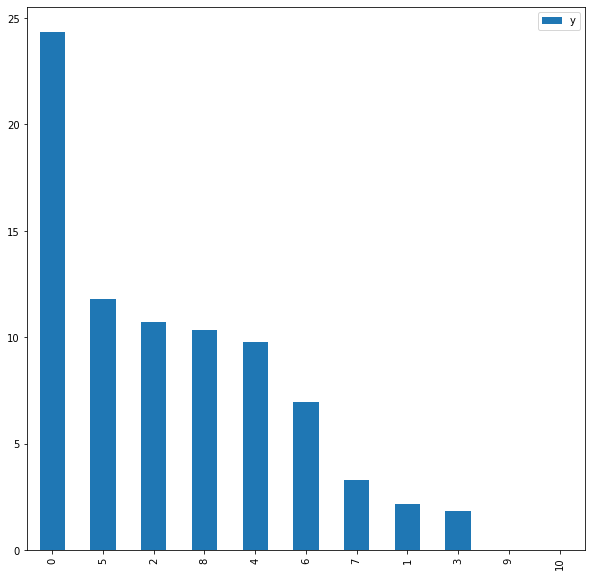

In [74]:
c1=['Agriculture,forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services']
c2=[PerSubSector1_C4,PerSubSector2_C4,PerSubSector3_C4,PerSubSector4_C4,PerSubSector5_C4,PerSubSector6_C4 ,PerSubSector7_C4,PerSubSector8_C4,PerSubSector9_C4, PerSubSector10_C4,PerSubSector11_C4]
data={'x':c1,'y':c2}
df3=pd.DataFrame(data)
df3['y'].astype(float)
fig=plt.figure(figsize=(5,5))
df3.sort_values(['y'], axis=0,ascending=False, inplace=True)
ax=df3[['x','y' ]].plot(kind='bar')
plt.xticks(rotation=90)


### The top sub sectors that contribute to approximately 80% for C4 Category in that order are as follows:
1. Agriculture, forestry and fishing
2. Trade, repair, hotels and restaurants
3. Manufacturing
4. Real estate, ownership of dwelling & professional services
5. Construction
6. Transport, storage, communication & services related to broadcasting
7. Financial services
8. Mining and quarrying
9. Electricity, gas, water supply & other utility services

###  Some of the other insights that we can draw are as follows:
1. Category C1 states are dominent in top four sectors of Manufacturing, Agriculture, Trade, Repair, hotels and restaurants and Real estate. This shows that there are 5 sub sectors are contributing to the overall per capita in C1 Category states, where as in C2 states 3 were sub sectors were dominant.
2. C3 and C4 Category states were mainly dominant on Agriculture which contributes to approx 25% of its GDP
3. All the categories should focus on Electricity and gas production sectors along with improving Water Supply and Other Utility services.
4. All categories should also focus on Financial services as they are low across all categories and has lot of potential to reach wider population
5. Agriculture, Manufacturing, Trade, Repair, hotels and restaurants and Real estate are the main sub sectors which contribute heavily to the nations GDP. These sectors also correlate to the high GDP as well.

### Finall Recommendations to improve Per Capita GDP per Category


1. For C1 Category states as these are good on 4 major categories and so to improve it is important to develop Transportation and Financial services which are upcoming. Improve the Road connectivity, expand the banks in rural locations and encourage the NBFCs in these states.
2. For C2 Category states as these states the upcoming areas seems to be Trade, Construction and Financial services which are upcoming sub sectors. Improving Trade policies such as single window clearances for new businesses to start, Improving the construction sector by strengthening RERA for housing and commercial sector, expanding the banks in rural locations.
3. For C3 and C4 Category states, these are mostly dominant on the Agriculture. So ensuring the power supply to these sates is very important. This will improve the Electricity Sector as well as ensure the power to the farmers. Secondly improving the Financial services by increasing the banks and NBFC will improve the very needed financeial support for the farmers and also improves the overall Per Capita GDPs in the states.


# Loading file  for part 2...

In [75]:
# path where all files are stored...
path=r'C:\Users\susha\Downloads\Neelima\DataScience\GDPAssignment\Data2'

# Reading all the paths...
all_files=glob.glob(path+'\\*.csv')

# Empty list to add all the dataframes...
all_dfs=[]
col=[]

# Loop to read each file with the given path...
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='cp1252')
    
# Selecting required columns from the file and renaming the columns...    
dfpart2=df[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]   
dfpart2.columns=['State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']

### Removing union territories from the file

In [76]:
#Listing out all the union territories...
UT=['A & N Islands','Puducherry','Chandigarh','Delhi','Dadra & Nagar Haveli','Daman & Diu','Lakshadweep']
dfpart2.drop(dfpart2[dfpart2['State'].isin(UT)].index,inplace=True)
dfpart2.reset_index(drop=True, inplace=True)

### Rearranging dataframes for merging...

In [77]:
# Arranging dataframes for mismatch of the states...
dfpart2['State']=dfpart2['State'].str.replace(" and "," ")
dfpart2['State']=dfpart2['State'].str.replace("Uttrakhand","Uttarakhand")
dfpart2['State']=dfpart2['State'].str.replace("Chhatisgarh","Chhattisgarh")
df_part1B['State']=df_part1B['State'].str.replace("_"," ")
df_part1B

,State,"1Agriculture, forestry and fishing",1.1Crops,1.2Livestock,1.3Forestry and logging,1.4Fishing and aquaculture,2Mining and quarrying,TotalPrimary,3Manufacturing,"4Electricity, gas, water supply & other utility services",...,13Taxes on Products,14Subsidies on products,15Gross State Domestic Product,16Population ('00),17Per Capita GSDP (Rs.),%Pri_con,%Sec_con,%Ter_con,GSDP_rank,Category
0,Andhra Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,...,5512100,1690800,52646842,501510,104977,30.968080,19.923102,41.850453,22.0,C2
1,Arunachal Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,...,70099,30272,1676119,14870,112718,42.774946,17.152064,37.696846,3.0,C2
2,Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,...,1725309,582406,19809800,326780,60621,26.889201,20.359070,46.982347,12.0,C4
3,Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,...,3213546,2006421,37391988,1101240,33954,21.448437,16.005825,59.317437,17.0,C4
4,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,...,2601791,1332092,23498180,270530,86860,27.239629,35.061805,32.295173,14.0,C3
5,Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,...,527279,61854,4063307,14950,271793,7.681649,38.085628,42.778382,8.0,C1
6,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,...,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,17.750506,36.896684,33.764756,24.0,C2
7,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,...,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,18.379705,28.714286,43.950252,18.0,C1
8,Himachal Pradesh,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,...,895317,259291,10436879,70840,147330,14.835527,39.467373,39.603084,10.0,C2
9,Jammu Kashmir,1586705,949424,433133,168093,36055,33621,1620326,893207,597421,...,764270,233563,10040446,132390,75840,16.137988,22.669630,55.906700,9.0,C3


### Merging part1B and part2 files to do the analysis...

In [78]:
# Merging part1B and Part2 files..
df_part2=result = pd.merge(df_part1B, dfpart2, on='State')
df_part2=df_part2[['%Pri_con','%Sec_con','%Ter_con','Primary - 2014-2015','Upper Primary - 2014-2015','Senior Secondary - 2014-2015']]

In [79]:
#Finding correlation between primary,upper,secondary and %contribution of primary,secondary and territory values..
corelation=df_part2.corr()
corelation

,%Pri_con,%Sec_con,%Ter_con,Primary - 2014-2015,Upper Primary - 2014-2015,Senior Secondary - 2014-2015
%Pri_con,1.000000,-0.588646,-0.147342,0.417505,0.552295,0.288943
%Sec_con,-0.588646,1.000000,-0.676509,-0.447312,-0.394896,0.066819
%Ter_con,-0.147342,-0.676509,1.000000,0.267578,-0.028605,-0.239428
Primary - 2014-2015,0.417505,-0.447312,0.267578,1.000000,0.625241,0.253925
Upper Primary - 2014-2015,0.552295,-0.394896,-0.028605,0.625241,1.000000,0.038142
Senior Secondary - 2014-2015,0.288943,0.066819,-0.239428,0.253925,0.038142,1.000000


### Plotting heatmap for better analysis...

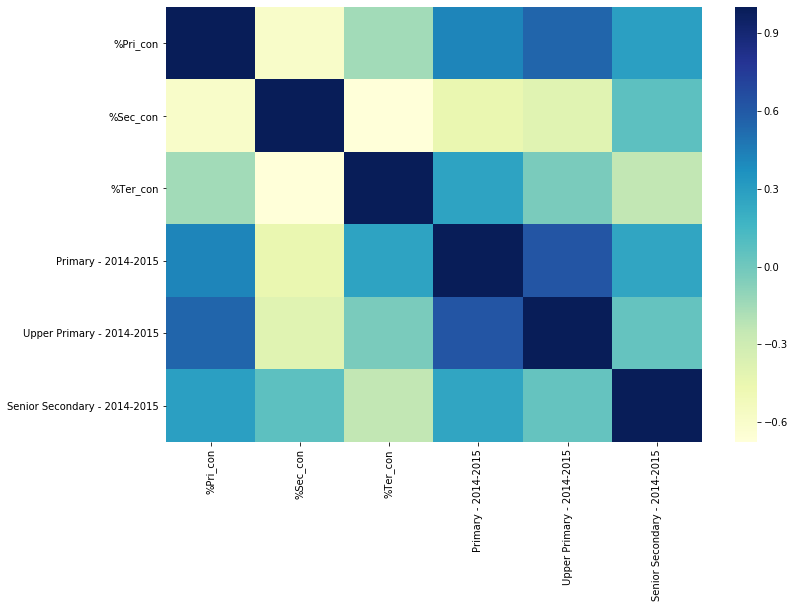

In [80]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(corelation, cmap="YlGnBu")
plt.show()

#### From the heat map the following observations are made:
1. For the states whose GSDP is high in the Primary sectors the drop out rates are directly correlated to all levels of schooling drop outs
2. For the states whose GSDP is high in secondary sectors the drop out rates are directly correlated to senior secondary and inversely correlated to  Primary and Upper Primary level school drop outs.
3. For the states whose GSDP is high in Teritiary sectors the drop out rates are directly correlated to primary and inversely correlated to remaing schooling level drop outs.